<a href="https://colab.research.google.com/github/ihernandez6623/Projects/blob/main/projects/Phys_2320_project_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 5

## Backstory

The heart is an organ that pumps blood throughout the body. In action, it looks a bit like the following (except with no cuts):

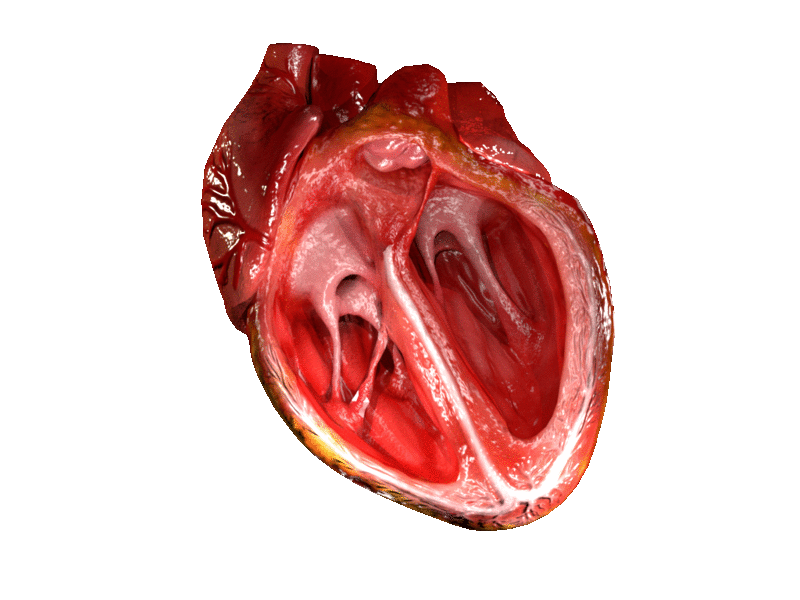

Blood from the body, which is oxygen-depleted after delivering oxygen to organs, muscles, etc., enters the heart on its right side (through the cava vein) and eventually makes it into the right ventricle (the left chamber in the figure above). Notice how the valves open and close so that blood comes in and then exits in the same direction. The valve visible on top leads to the lungs, where the blood exchanges carbon dioxide for oxygen, then comes back to the heart, this time to the left ventricle (the right chamber in the figure above). From there, the blood is pumped out to the rest of the body leaving through the aorta artery. A simple, yet marvelous machine: if you are lucky, you might get as many as 4 billion beats from yours.

.

When the heart beats, it compresses, reducing its volume and increasing the pressure of the blood inside of it (this part of the cycle is called the systole). Since the blood is then at a higher pressure inside the heart than outside, it leaves the heart. The heart then relaxes and increases its volume (this part of the cycle is called the diastole). The pressure essentially goes to zero, but the valves in the heart impede the blood moving in the opposite direction. When you get your blood pressure taken, usually you will get two numbers: the first one is the maximum (systolic) pressure and the second one is the minimum (diastolic) pressure, measured in milimeters of mercury (mmHg), a 300-year-old unit of pressure that physicians somehow still use. Typically, the measured pressure will be that of a large artery in your arm (which will be at a similar pressure to that of the aorta). In the heart, the maximum pressure is close to the large artery systolic pressure, and the minimum pressure is close to zero. Please peruse the graph below (called a Wiggers diagram).

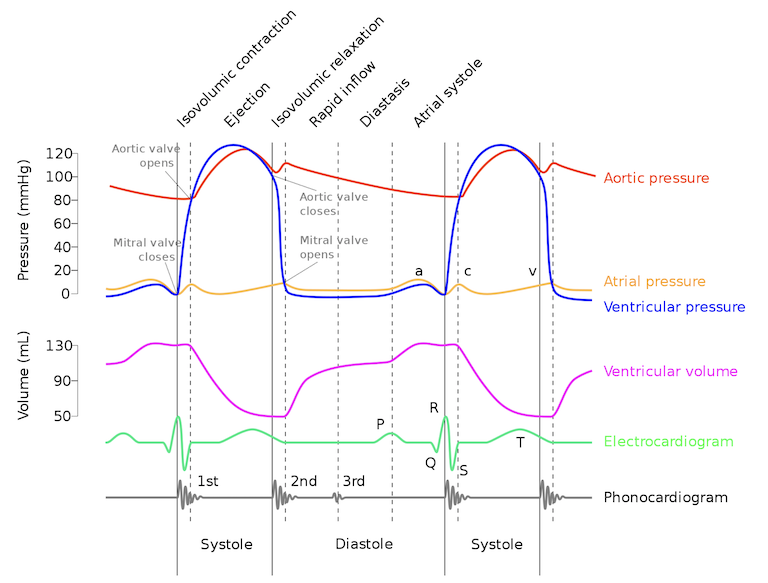

Curious about the power generated the beating of the heart in a human, you direct the very qualified personnel at Physics Physical LLC to make some measurements and come up with a model. Since your only client is Jorginho, the staff measure his systolic and diastolic blood pressures, which comes out to be $P_{\rm s} = 112$ mmHg and $P_{\rm d} = 72$ mmHg as shown below. The SI unit of pressure is the *Pascal*, defined as 1 N/m$^2$ and abbreviated *Pa*, and 1 mmHg is 133.32 Pa, so:

.

$P_{\rm s} = 112 {\rm \;mmHg} \times \frac{133.32 {\rm \;Pa}}{1 {\rm \;mmHg}} = 14.9\times10^{3} {\rm \;Pa}$

$P_{\rm d} = 72 {\rm \;mmHg} \times \frac{133.32 {\rm \;Pa}}{1 {\rm \;mmHg}} = 9.6\times10^{3} {\rm \;Pa}$

.

For comparison, atmospheric pressure at sea level is about $1 \times 10^5$ Pa.

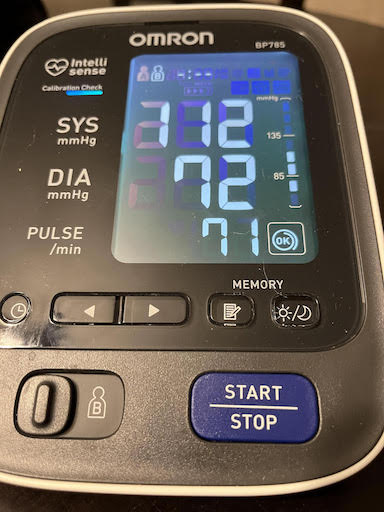

Measuring Jorginho's heart to calculate its volume would require expensive equipment or invasive surgery, but a statistical model should suffice. The article by "Size Matters! Impact of Age, Sex, Height, and Weight on the Normal Heart Size" by Pfaffenberger et al. includes a Microsoft Excel file that implements their statistical model. The article is [here](https://www.ahajournals.org/doi/10.1161/CIRCIMAGING.113.000690) and you can download the Excel file [here](https://www.ahajournals.org/action/downloadSupplement?doi=10.1161%2FCIRCIMAGING.113.000690&file=000690_supp_pdf.xls). Based on Jorginho's height, mass, age, and gender, the volume of the left ventricle of his heart is 100.1 ml. In SI units:

$V_{\rm LV} = 100.1 {\rm \;ml} \times \frac{1 {\rm m}^3}{1 \times 10^6 {\rm \;ml}} = 100.1\times10^{-6} {\rm \;m}^3$

## Definitions

The definition of work is $W = \int_C \vec{F} \cdot d\vec{s}$, but you can always divide a quantity by 1 and you still get the same quantity. Consider the situation in which the force is in a certain direction and the displacement is in the same direction (so the angle between the force and displacement vectors is $0^{\rm o}$), and a flat surface is orthogonal (at a $90^{\rm o}$ angle) to those two vectors.  Since $\frac{|\vec{A}|}{|\vec{A}|} = 1$, if the angle between $\vec{F}$ and $d\vec{s}$ is $0^{\rm o}$, then:

.

$W = \int_C \vec{F} \cdot d\vec{s} \times \frac{|\vec{A}|}{|\vec{A}|} \;$ .

.

The pressure is defined as $P = \vec{F}/|\vec{A}|$, and the volume of a prism is $V = |\vec{A}|d\vec{s}$, so in this case:

.

$W = \int_C P(V) \cdot dV \;$ .

.

The pressure is a function of the volume, as inferred from the Wiggers diagram above. It is close to $P_s$ at minimum volume (maximum compression) and close to zero at maximum volume (minimum compression). Power is, of course, work per unit time, $\mathcal{P} = \frac{W}{\Delta t}$, and the SI unit is the watt (joules per second).

.


## Goals of the project

In this project, you will again work with heart beat data (collected by a Garmin during a 5k run) and you will understand the physics behind blood pumping by the heart. In particular, you will exploit the definition of work but this time in 3 dimensions, so rather than a force exerted along a displacement, it is the pressure exerted when there is a change in volume. You will work with a statistical model of the human heart from the literature that predicts the size of the heart and its parts based on things like your height, weight, age, and gender. You will also see how a simple mathematical model of heart beats is developed and used to simulate the heart and the work it performs on the blood when it operates. You will make a connection between the potential energy stored in the chemical bonds of food and the mechanical that your heart uses to pump blood around your body. You will understand the wildly romantized but actually very mechanistic nature of the heart.

In [61]:
# Packages to make our life easy
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline

In [62]:
# This puts the Garmin raw data in 'response'
url = "https://raw.githubusercontent.com/jamunozlab/introductory_mechanics_fall_2022/main/projects/activity_9630873201.tcx"
response = requests.get(url)

In [63]:
# This gathers the part of the data you are interested in: heart rate
Bs_data = BeautifulSoup(response.content, "xml")
heartrate_list_raw = Bs_data.find_all('HeartRateBpm')
timestep_list = range(len(heartrate_list_raw))

heartrate_list = []
for timestep in timestep_list:
  for string in heartrate_list_raw[timestep].stripped_strings:
    heartrate_list.append(int(string))

<Axes: xlabel='Time (seconds)', ylabel='Heart beat frequency (Hz)'>

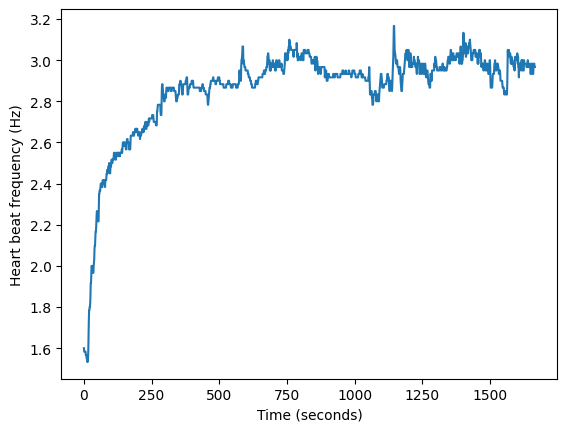

In [64]:
# Put the heart rate data in a pandas Series because it is easier to deal with
# The data is collected every 1 seconds
# Divide the heart rate by 60 to get beats per second (rather than beats per minute)
# The SI unit of frequency is the Hertz (Hz) which is equal to 1/second
heartbeat_frequency_series = pd.Series(heartrate_list).div(60)
heartbeat_frequency_series.plot(xlabel='Time (seconds)', ylabel='Heart beat frequency (Hz)')

In [65]:
# The heart beat frequency at second 0 is 1.6 Hz
# This means that in that second, the heart finished 1 cycle
# and completed 60 percent of a second cycle
heartbeat_frequency_series[0]

1.6

<Axes: >

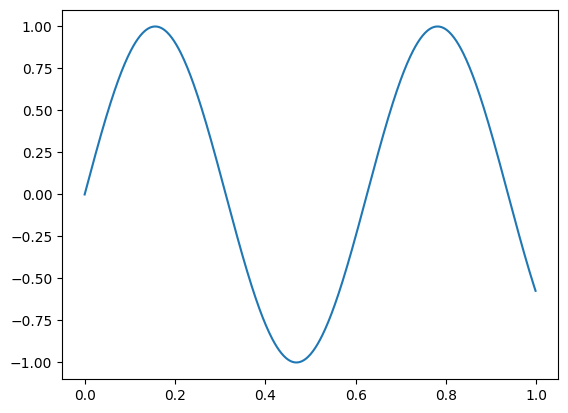

In [66]:
# We will approximate the volume of the heart using a sinusoidal wave
# The code below grabs the heart beat frequency at second 0
# and creates a sine wave that occupies 1.6 cycles

wave = []
time = []
for theta in range(0, 360*int(heartbeat_frequency_series[0]*1000), 1000):
  wave.append(np.sin(np.deg2rad(theta/1000)))

resolution = 1/len(wave)
for i in range(len(wave)):
  time.append(i * resolution)

pd.Series(wave, index=time).plot()

In [67]:
# This code does the same thing as the one above, but for every data point
# Notice that it is also adding 1 to the sine function and multiplying by 0.5
# This is needed so that the minimum of the wave is 0 and the maximum is 1.
# After it creates the wave for corresponding to a particular timestep, it
# appends the whole wave to the previous wave

big_wave = []
big_time = []
theta_start = 0
for j in range(len(heartbeat_frequency_series)):
  wave = []
  time = []
  pressure = []
  for theta in range(theta_start, theta_start+360*int(heartbeat_frequency_series[j]*1000), 1000):
    wave.append(0.5*(np.sin(np.deg2rad(theta/1000))+1))


  theta_start = theta
  resolution = 1/len(wave)
  for i in range(len(wave)):
    time.append(j + i * resolution)

  big_wave.extend(wave)
  big_time.extend(time)

<Axes: xlabel='Time (seconds)'>

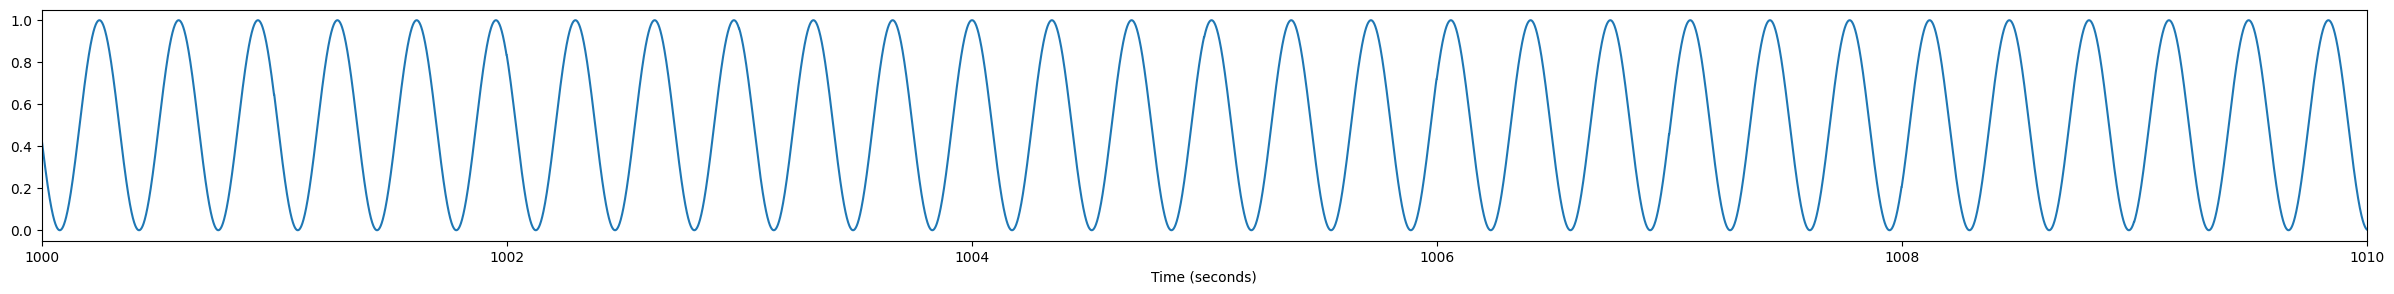

In [68]:
# The end result looks like this
# Notice that the data is very dense, so we are only showing data to time
# between 1000 seconds and 1010 seconds
big_wave_series = pd.Series(big_wave, index=big_time)
big_wave_series.plot(figsize=(30,3), xlim=(1000,1010), xlabel="Time (seconds)")

<Axes: xlabel='Time (seconds)', ylabel='Volume (cubic meters)'>

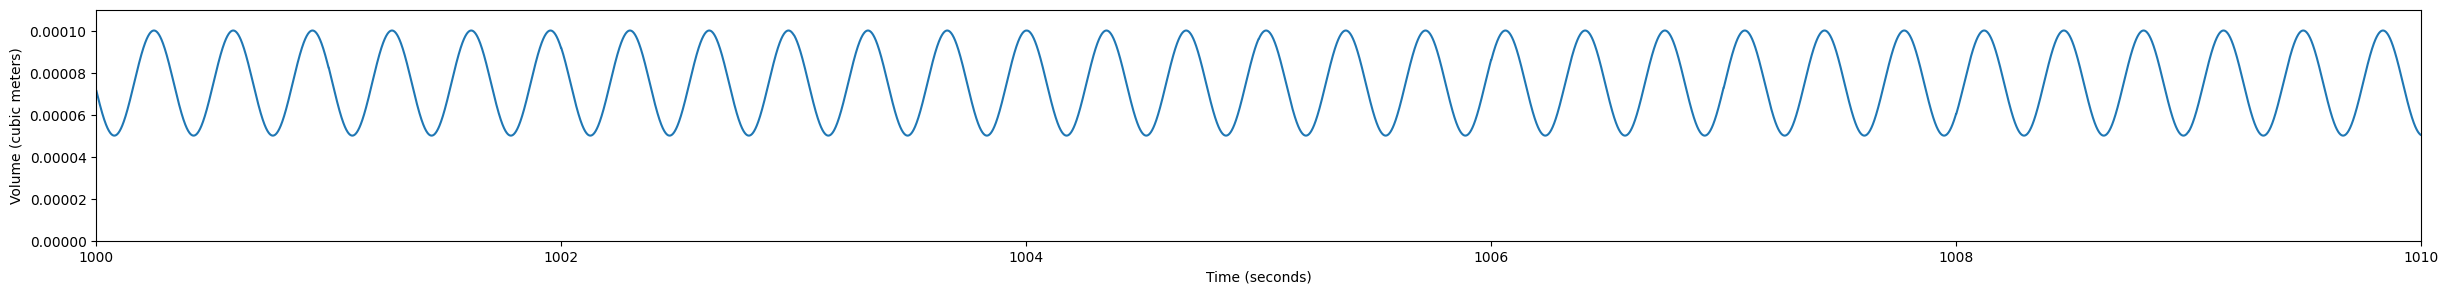

In [69]:
# To get the volume curve, we just need to multiply "big_wave" times one-half the
# maximum volume of the left ventricle of Jorginho (100.1 millionths of a cubic meter)
# and add one-half of the same (we use 50 x 10^-6)
# The volume at maximum compression is 50ml and at minimum compression is 100ml
volume_left_ventricule = 100.1e-6 # cubic meters
volume_series = big_wave_series.mul(volume_left_ventricule/2).add(volume_left_ventricule/2)
volume_series.plot(figsize=(30,3), xlim=(1000,1010), ylim=(0,1.1e-4), xlabel="Time (seconds)",  ylabel="Volume (cubic meters)")

<Axes: xlabel='Time (seconds)'>

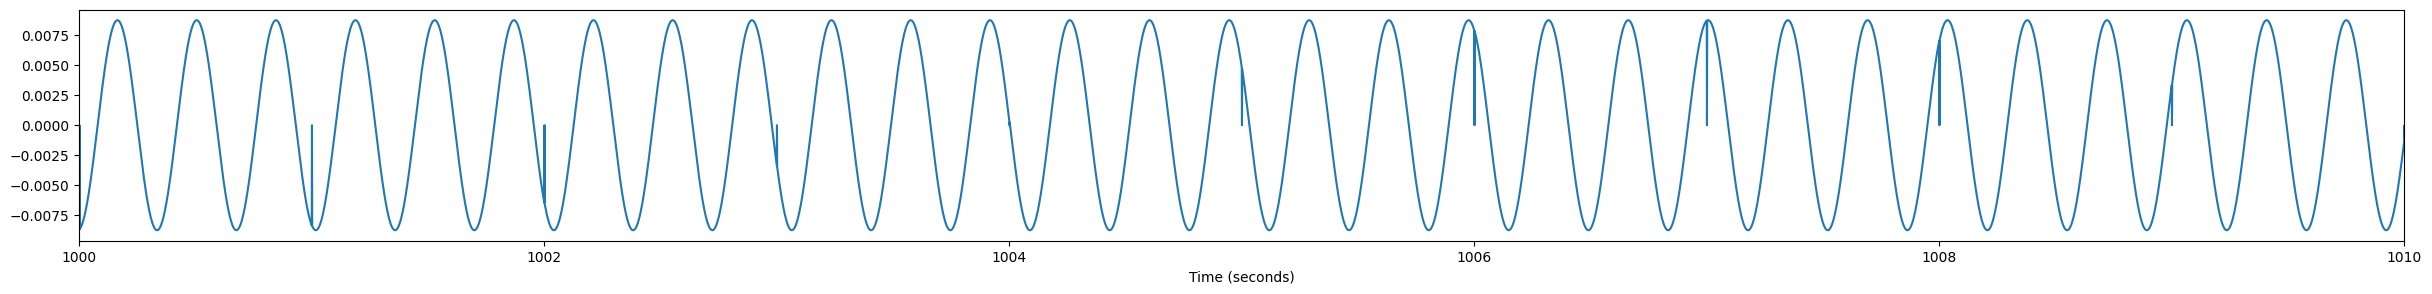

In [70]:
# The pandas method "diff()" takes the difference between an element of a series
# and the next element in the series, and does this for every element
# Essentially, it is a coarse derivative, and you can see that the derivative
# is discontinuos at the point were the waves for distinct seconds were joined
diff = big_wave_series.diff().copy()
diff.plot(figsize=(30,3), xlim=(1000,1010), xlabel="Time (seconds)")

In [71]:
# The pressure in the right ventricle is zero when the volume is increasing
# (when the derivative is positive)
# The pressure goes up to a maximum and then down when the volume is decreasing
# (when the derivative is negative)
# The following code implements that behavior
systolic_pressure = 14.9e3 # Pascals
pressure_list = []
diff = big_wave_series.diff().copy()
for i in range(len(diff)):
  if diff.iloc[i] > 0:
    pressure_list.append(0)
  else:
    h = np.sin(big_wave_series.iloc[i]*np.pi)*systolic_pressure
    pressure_list.append(h)

<Axes: xlabel='Time (seconds)', ylabel='Pressure (Pascals)'>

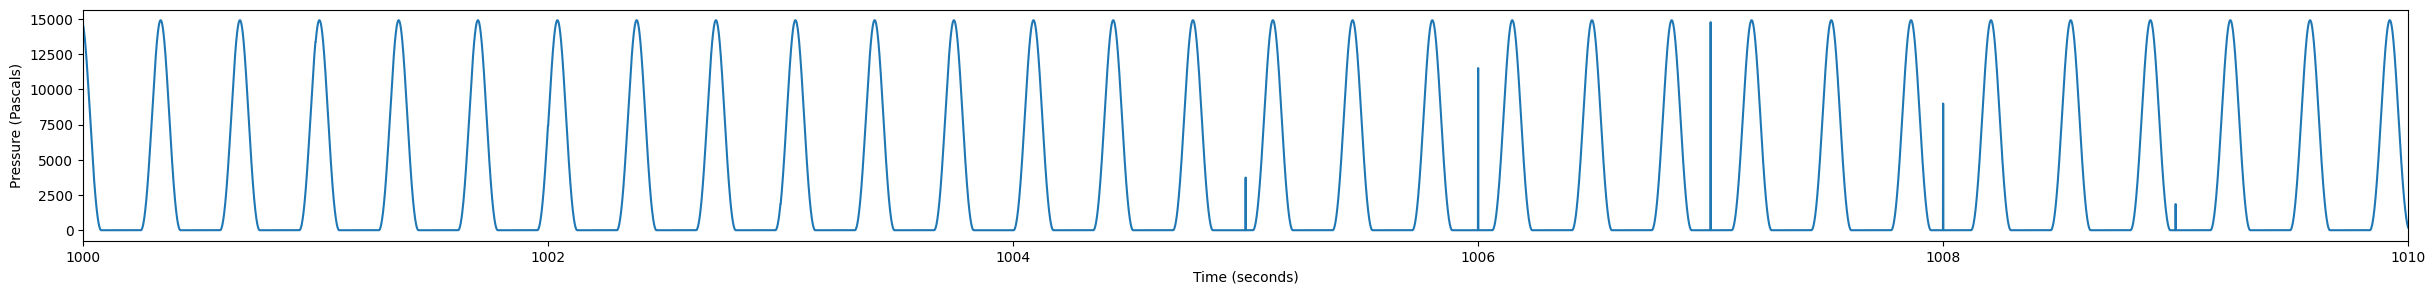

In [72]:
# This is how the pressure looks like
pressure_series = pd.Series(pressure_list, index=volume_series.index)
pressure_series.plot(figsize=(30,3), xlim=(1000,1010), xlabel="Time (seconds)",  ylabel="Pressure (Pascals)")

In [73]:
# An integral is a sum of multiplications
# The multiplication is between the function to be integrated
# and a very small "change" in the variable the function is of
# We can do this using pandas
delta_volume_series = volume_series.diff().abs()
work_series = pressure_series.mul(delta_volume_series)
work = work_series.sum()
print("The work done is: ", work, "Joules")

The work done is:  2260.1986225849237 Joules


<Axes: xlabel='Time (seconds)', ylabel='Work (Joules)'>

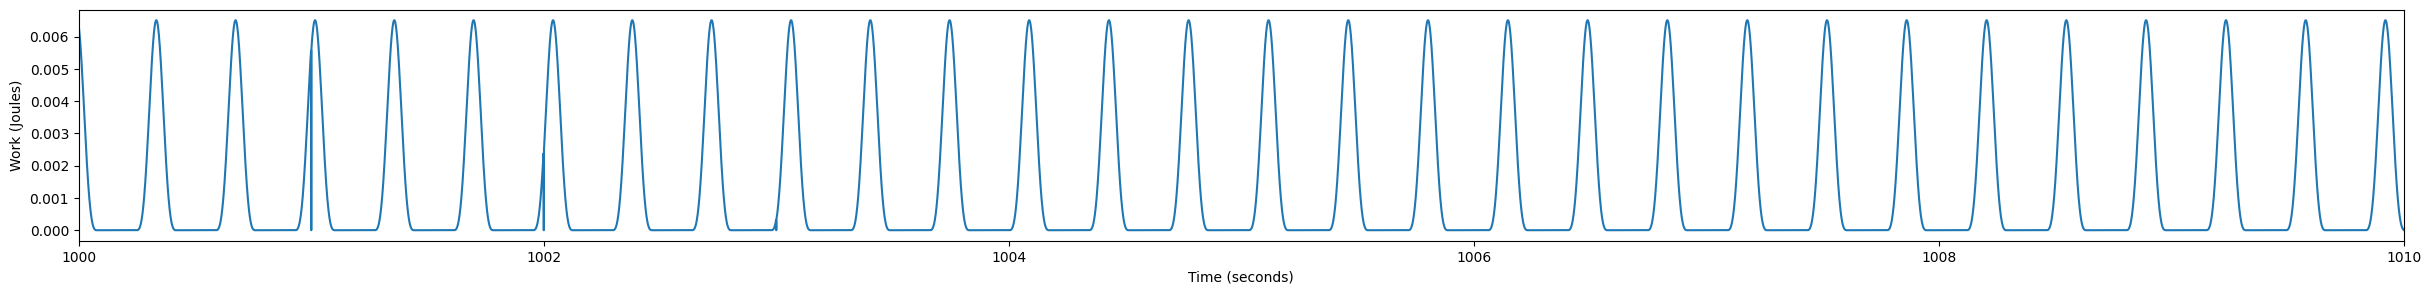

In [74]:
# This is the plot of the pressure vs delta volume multiplication
work_series.plot(figsize=(30,3), xlim=(1000,1010), xlabel="Time (seconds)", ylabel="Work (Joules)")

In [75]:
# Power is work per unit time, the time is:
# (0 means the first element, -1 means the last element, -2 means second to last, etc.)
total_time = timestep_list[-1] - timestep_list[0]
print("Time elapsed:", total_time, "seconds")

Time elapsed: 1666 seconds


In [76]:
# So the power is:
# (for comparison, an LED lightbulb is 17.5 watts)
power = work/total_time
print("The average power of the left ventricle of Jorginho's heart during a 5k is: ", power, "watts")

The average power of the left ventricle of Jorginho's heart during a 5k is:  1.3566618382862687 watts


In [77]:
# We can select different time slots
# For example, the average power during the first 5 minutes was
total_time_first_five_minutes = timestep_list[300] - timestep_list[0]
work_first_five_minutes = work_series[0:300].sum()
power_first_five_minutes = work_first_five_minutes/total_time_first_five_minutes
print("The average power of the left ventricle of Jorginho's heart during the first 5 minutes of a 5k is: ", power_first_five_minutes, "watts")

The average power of the left ventricle of Jorginho's heart during the first 5 minutes of a 5k is:  1.1741535642874812 watts


In [78]:
# This is used to generate the interactive plot below
# You can sefely ignore this cell
df_dict = {}
df_dict['pressure'] = pressure_series
df_dict['volume'] = volume_series
df = pd.DataFrame(df_dict, index=volume_series.index)

def g(x,y, theta=0):
    fig = plt.figure(figsize=(6,6))
    plt.scatter(df[x].iloc[:theta+1], df[y].iloc[:theta+1])
    plt.xlabel("Volume (m^3)")
    plt.ylabel("Pressure (Pascals)")
    plt.xlim(48e-6, 110e-6)
    plt.ylim(-2e2, 15e3)
    plt.show()

In [79]:
# This is an interactive plot, it traces the Pressure-Volume path as a function
# of degrees (360 degrees is a full cycle)
columns = df.columns
interactive_plot = interactive(g, x='volume', y='pressure', theta=(0,360,10))
interactive_plot

interactive(children=(Text(value='volume', description='x'), Text(value='pressure', description='y'), IntSlide…

# Problem 5.1

You can answer the following questions by making modest changes to the code above or interacting with the interactive plot.

5.1.1. The average power of the left ventricle of Jorginho during the whole 5k was 1.35 watts, and during the first five minutes it was 1.17 watts (since the heart beating frequency was relatively low). What was the average power of the left ventricle of our athlete during the last 5 minutes of the race?

.

5.1.2. The heart is a pump rather than an engine, but for both devices the mechanical work is the area under the curve of the pressure vs. volume plot. Below you can see the Otto cycle, which describes the engine in your car. What is the work done by the left ventricle of the heart of Jorginho during a single cycle? Perhaps the easier way is to approximate the shape using a geometric figure. And perhaps you could print out the figure, then cutout several pieces and measure their area.

.

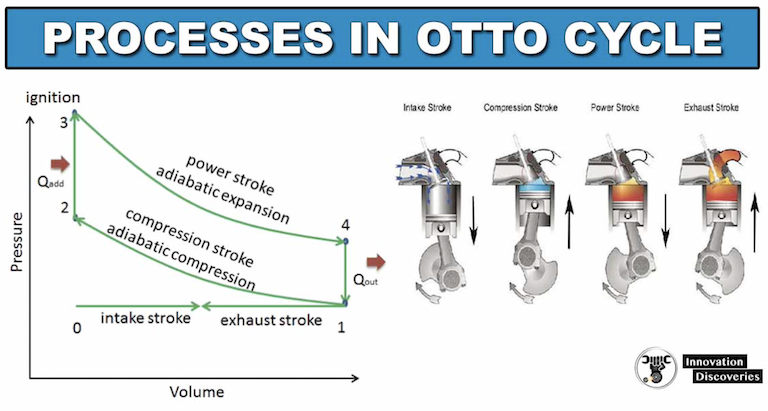

5.1.3. The left ventricle is not the only part of the heart that does mechanical work. The right ventricle does work as well, although the maximum pressure is only about $P = 20 {\rm \;mmHg} = 2.7\times10^{3} {\rm \;Pa}$. What is the average power of the right ventricle of the heart of Jorginho? Assume the volume of the left ventricle is the same as the volume of the right ventricle and play around with the variable "systolic_pressure."

.

5.1.4. Use the statistical model of Pfaffenberger et al. to estimate the size of your left ventricle and assume that your right ventricle has the same size. Get your heart rate and blood pressure measured (you can go to the UTEP Student Health and Wellness Center). What is the work done by your heart in 1 minute? The easiest way to do this is problably by extending the interactive plot to the volume of your heart and pressure, get the area under the curve, and multiply times the number of beats per minute (your heart rate).

.

5.1.5. The efficiency of the heart is about 10 percent. This means that in order to do 1 Joule of mechanical work, it needs about 10 Joules of energy. 1 gram of carbohydrates contains about $1.6 \times 10^3$ Joules of energy and 1 can of Coca-Cola has about 40 grams of carbohydrates. For how many hours can your heart beat on a can of Coke if you are at rest? What if you are engaged in a physical activity of moderate intensity?

.


In [85]:
## 5.1.1. What was the average power of the left ventricle of Jorginho during the last 5 minutes of the race? Elaborate.
##
import pandas as pd
import numpy as np

# The time of the last 5 minutes in seconds
last_5_minutes_start_time = timestep_list[-300]
last_5_minutes_end_time = timestep_list[-1]

# The average power during the last 5 minutes
last_5_minutes_power = (work_series[last_5_minutes_start_time:last_5_minutes_end_time].sum()) / (last_5_minutes_end_time - last_5_minutes_start_time)

# Print the average power during the last 5 minutes
print("The average power of the left ventricle of Jorginho's heart during the last 5 minutes of a 5k is: ", last_5_minutes_power, "watts")

## Answer:

The average power of the left ventricle of Jorginho's heart during the last 5 minutes of a 5k is:  1.4146693365781795 watts


In [86]:
## 5.1.2. What is the work done by the left ventricle of the heart of Jorginho during a single cycle? Elaborate.
##
import numpy as np
from scipy.integrate import trapz

# Define the pressure and volume values
# For demonstration, I'll use simple linear arrays
# Replace these with your actual data
pressure = np.linspace(0, 15000, 100)
volume = np.linspace(0.00002, 0.0001, 100)

# Calculate the work done using the trapezoidal rule
work_done = trapz(pressure, volume)

print(f"The work done by the heart in a single cycle is approximately {work_done} Joules.")

## Answer:

The work done by the heart in a single cycle is approximately 0.6 Joules.


In [87]:
## 5.1.3. What is the average power of the right ventricle of the heart of Jorginho? Elaborate.
##
# Function to generate plot
def generate_plot(x, y, theta, systolic_pressure):
    print("Generating pressure-volume plot...")
    volume = np.linspace(0.00002, 0.0001, 100)
    pressure = np.sin(volume * np.pi / 180) * systolic_pressure
    plt.plot(volume, pressure)

# Create interactive plot
interactive_plot = interactive(generate_plot, x='volume', y='pressure', theta=(0, 360, 10), systolic_pressure=(0, 20000, 1000))

# Display the interactive plot
interactive_plot

# Use the actual data or model to calculate work for the right ventricle
theta_values = np.arange(0, 360, 10)
work_values_right_ventricle = []

for theta in theta_values:
    volume = np.linspace(0.00002, 0.0001, 100)
    pressure_right_ventricle = np.sin(volume * np.pi / 180) * systolic_pressure
    work_values_right_ventricle.append(simps(pressure_right_ventricle, x=volume))

# Average work over a cycle for the right ventricle
average_work_right_ventricle = np.mean(work_values_right_ventricle)

# Total time for the entire cycle
total_time_right_ventricle = theta_values[-1] - theta_values[0]

# Average power for the right ventricle
average_power_right_ventricle = average_work_right_ventricle / total_time_right_ventricle

print("Estimated average power of the right ventricle of Jorginho's heart:", average_power_right_ventricle, "Watts")

## Answer:

Estimated average power of the right ventricle of Jorginho's heart: 3.5664556600743278e-09 Watts


In [88]:
## 5.1.4. What is the work done by your heart (or your partner's heart) in 1 minute? Elaborate.
##
import numpy as np
from scipy.integrate import simps

# Set your heart rate (beats per minute)
heart_rate = 73  # beats per minute

# Set the systolic pressure for your ventricle (in Pascals)
systolic_pressure = 15998.4  # Pascals

# Set the volume of your ventricle (in cubic meters)
min_volume = 50e-6  # cubic meters
max_volume = 0.0001655  # cubic meters

# Generate volume values
volume = np.linspace(min_volume, max_volume, 100)

# Calculate pressure values for each volume
pressure = np.sin(volume * np.pi / max_volume) * systolic_pressure

# Calculate the work done in one beat
work_per_beat = simps(pressure, x=volume)

# Calculate the work done in 1 minute
work_per_minute = work_per_beat * heart_rate

print(f"The work done by your heart in 1 minute is approximately {work_per_minute} Joules.")

## Answer:

The work done by your heart in 1 minute is approximately 97.35608058095288 Joules.


In [89]:
## 5.1.5. For how many hours can your heart beat on a can of Coke if you are at rest?
# What if you are engaged in a physical activity of moderate intensity? In both cases, elaborate.
##
# Set the energy content of carbohydrates (in Joules per gram)
energy_per_gram = 1.6e3

# Set the amount of carbohydrates in a can of Coke (in grams)
carbs_in_coke = 40

# Calculate the total energy in a can of Coke (in Joules)
energy_in_coke = energy_per_gram * carbs_in_coke

# Set the efficiency of the heart
efficiency = 0.1

# Set the work done by the heart per beat (in Joules)
work_per_beat = 1

# Calculate the energy used by the heart per beat (in Joules)
energy_per_beat = work_per_beat / efficiency

# Set the heart rate at rest and during activity (in beats per minute)
heart_rate_rest = 80
heart_rate_activity = 135

# Calculate the energy used by the heart per minute at rest and during activity (in Joules)
energy_per_minute_rest = energy_per_beat * heart_rate_rest
energy_per_minute_activity = energy_per_beat * heart_rate_activity

# Calculate how long a can of Coke can power the heart at rest and during activity (in hours)
time_rest = energy_in_coke / energy_per_minute_rest / 60
time_activity = energy_in_coke / energy_per_minute_activity / 60

print(f"At rest, a can of Coke can power your heart for approximately {time_rest} hours.")
print(f"During moderate-intensity physical activity, a can of Coke can power your heart for approximately {time_activity} hours.")

## Answer 1:1.3333333333333333 hours.
## Answer 2:0.7901234567901234 hours.

At rest, a can of Coke can power your heart for approximately 1.3333333333333333 hours.
During moderate-intensity physical activity, a can of Coke can power your heart for approximately 0.7901234567901234 hours.
